In [16]:
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


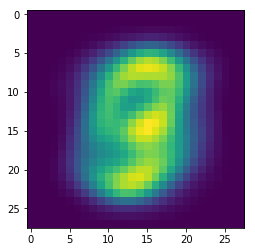

In [18]:
train_image_mean = train_images.mean(axis=0)
plt.imshow(train_images.mean(axis=0))

In [19]:
train_images = train_images.reshape(train_images.shape[0],28*28)
test_images = test_images.reshape(test_images.shape[0],28*28)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [21]:
%%time

clf = SGDClassifier(loss='log')
clf.fit(train_images, train_labels)

/usr/lib64/python3.4/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


CPU times: user 8.75 s, sys: 105 ms, total: 8.86 s
Wall time: 14.3 s


In [9]:
from keras import models
from keras import layers

In [10]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [11]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
from keras.utils import to_categorical

In [13]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
%%time

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 16s 263us/step - loss: 0.2715 - acc: 0.9210
Epoch 2/5
60000/60000 [==============================] - 11s 183us/step - loss: 0.1241 - acc: 0.9637
Epoch 3/5
60000/60000 [==============================] - 15s 256us/step - loss: 0.0890 - acc: 0.9738
Epoch 4/5
60000/60000 [==============================] - 30s 492us/step - loss: 0.0695 - acc: 0.9787
Epoch 5/5
60000/60000 [==============================] - 30s 502us/step - loss: 0.0578 - acc: 0.9819
CPU times: user 38.9 s, sys: 6.92 s, total: 45.8 s
Wall time: 1min 42s


In [25]:
train_image_mean.shape[0]

28

In [27]:
train_image_mean = train_image_mean.reshape(1,28 *28 )

In [29]:
result = network.predict_classes(train_image_mean)

In [31]:
print(result)

[8]
